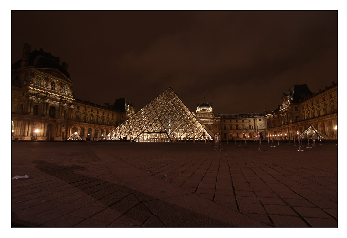

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as py
import ImageUtils as image_utils

%matplotlib inline


image = cv2.imread('C:/Users/Farzad Avari/Desktop/Artificial Intelligence/CV/fromTutor-20180901T044023Z-001/fromTutor/images/input.jpg')

transformed_image = image_utils.rearrange_img(image)

plt.imshow(transformed_image)
plt.xticks([]),plt.yticks([])
plt.show()


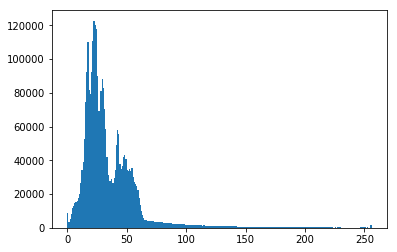

In [2]:
img_hist = cv2.calcHist([transformed_image],[0],None,[256],[0,256])
#img_hist = cv2.calcHist([transformed_image] , [0], None, [256], [0,256] )

plt.hist(transformed_image.ravel(),256,[0,256]);
plt.show()


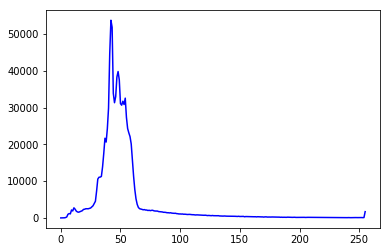

In [3]:
plt.plot(img_hist, color = 'b')
plt.show()

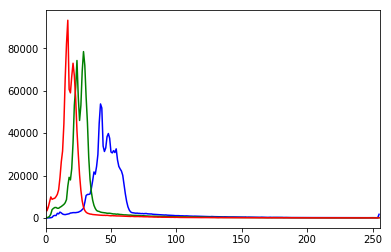

In [4]:
color = ('b','g','r')

#Enumerate to separate the channels into separate histogram calculations
for i,col in enumerate(color):
    channel_hist = cv2.calcHist([transformed_image], [i] , None, [256] , [0,256])
    plt.plot(channel_hist, color=col)
    plt.xlim([0,256])
    
plt.show()

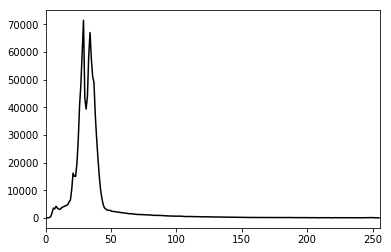

In [5]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_utils.plot_image_histogram(gray_img, [0])

plt.show()


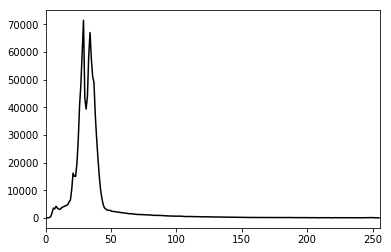

In [6]:
image_utils.plot_grayscale_histogram(image)

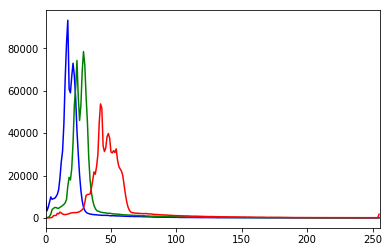

In [7]:
image_utils.plot_colorimage_histogram(image)

In [8]:
def plot_image_histogram(image, bin_size):
    fig,axes = plt.subplots(1,3, figsize(12,5))
    channels = {0:'B', 1:'G',2:'R'}
    
    for i,channels in enumerate([[2,1],[1,0],[2,0]]):
        hist=cv2.calcHist([image],channels, None, [bins]*2,[0,256]*2)
        
        channel_x = channel_map[channels[0]]
        channel_y = channel_map[channels[1]]
        
        ax = axes[i]
        ax.set_xlim([0,bins-1])
        ax.set_ylim([0,bins-1])
        
        ax.set_xlabel('Channel {channel_x}')
        ax.set_ylabel('Channel {channel_y}')
        
        ax.set_title('2D Histogram')
        
        ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        
        im = ax.imshow(hist)
        
        fig.colorbar(im, ax=axes.ravel().tolist(),orientation='horizontal')
        fig.suptitle('2D Histogram')
        plt.show()

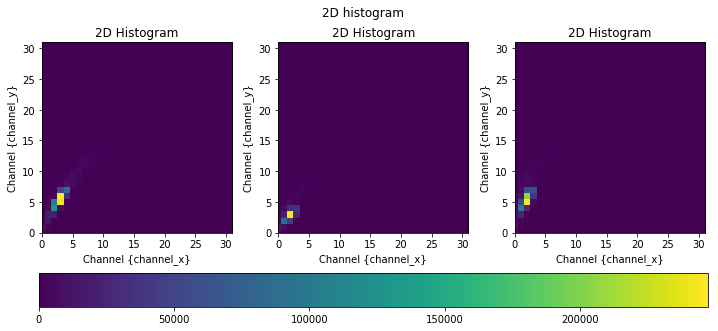

In [9]:

#image_utils.show_img_plt(image)
image_utils.plot_image_histogram2d(image)


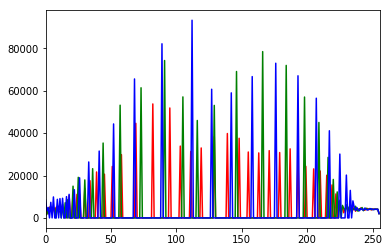

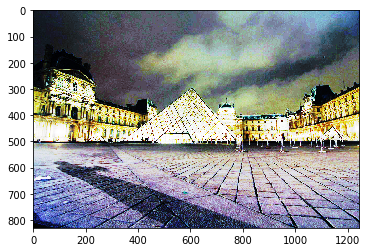

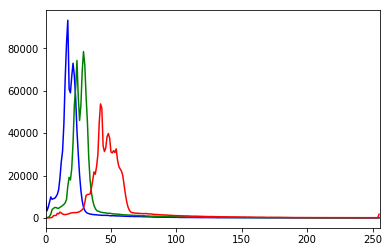

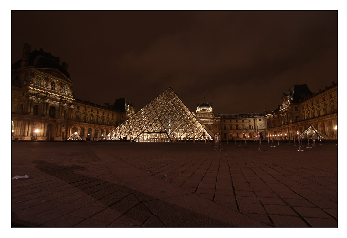

In [10]:
import cv2
from matplotlib import pyplot as plt

#Input is a BGR image
def plot_rgb_equalized(image):
    
    #Split the image into corresponding channels
    channels = cv2.split(image)
    #intantiate an equalized_channels vector
    eq_channels = []
    
    for channel, color in zip(channels, ['B','G','R']):
        eq_channels.append(cv2.equalizeHist(channel))
        
    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    
    image_utils.plot_rgb_color_histogram(eq_image)
    
    plt.imshow(eq_image)
    plt.show()
    

plot_rgb_equalized(image)
image_utils.plot_bgr_color_histogram(image)
image_utils.show_img_plt(image)

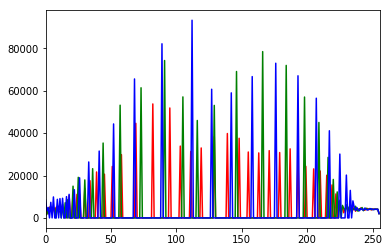

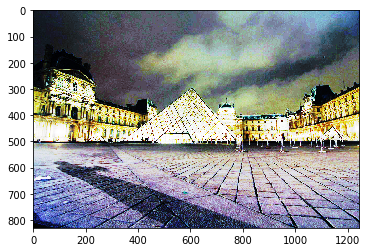

In [12]:
plot_rgb_equalized(image)

In [15]:
import cv2
from matplotlib import pyplot as plt

#Input is BGR

def plot_hsv_equalized(image):
    
    #convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    
    #intensity is given by the Value channel in HSV
    #Therefore value has to be equalized
    #other channels are un-touched
    eq_V = cv2.equalizeHist(V)
    
    eq_image = cv2.merge([H,S,eq_V])
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_HSV2RGB)
    
    image_utils.plot_rgb_color_histogram(eq_image)
    
    plt.imshow(eq_image)
    plt.show()

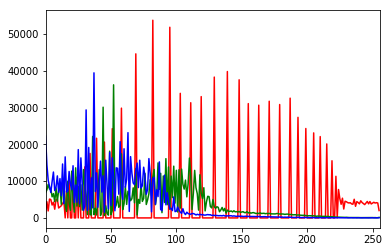

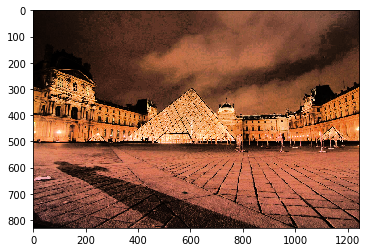

In [16]:
plot_hsv_equalized(image)